Making Visualizations with the Master File:

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Graph output styling from matplotlib:
plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')

In [6]:
# Global variables:
repo_dir = os.getcwd()  # Directory of the notebook
source_data_dir = os.path.join(repo_dir, 'fbref-dw-merges')
league_ids = ['ENG-Premier League', 'ESP-La Liga', 'FRA-Ligue 1', 'ITA-Serie A']
league_names = ['Premier League', 'La Liga', 'Ligue 1', 'Serie A']
league_names_dict = dict(zip(league_ids, league_names))

# Renaming column dictionaries for graphs:
df_col_rename = {'TklW' : 'Total Tackles Won', 'Sh.3' : 'Total Shots Blocked'}
mf_col_rename = {'PrgC.1' : 'Total Progressive Carries', 'npxG+xAG.1' : 'npxG + xA (per 90)'}
fw_col_rename = {'GCA90' : 'Goal-Creating Actions (per 90)', 'G+A-PK' : 'non-Penalty Goals + Assists (per 90)'}
# List of these dictionaries:
col_rename_dicts = [df_col_rename, mf_col_rename, fw_col_rename]

# "Big Team" list:
big_teams = ['Arsenal', 'Manchester City', 'Manchester Utd', 'Tottenham', 'Chelsea', 'Liverpool', 'Real Madrid', 'Barcelona', 'Atlético Madrid', 'Paris S-G', 'Juventus', 'Milan', 'Inter']

# Seaborn position-pallette dictionaries, mapped to the big team column:
def_hue_colors = {0 : 'slategrey', 1 : 'goldenrod'}
mf_hue_colors = {0 : 'slategrey', 1 : 'lightseagreen'}
fw_hue_colors = {0 : 'slategrey', 1 : 'orangered'}
# List of these dictionaries:
hue_dicts = [def_hue_colors, mf_hue_colors, fw_hue_colors]

# Seaborn league name color pallette:
league_colors = ['goldenrod', 'firebrick', 'lightseagreen', 'cornflowerblue']
league_color_pallette = dict(zip(league_names, league_colors))

In [20]:
# Function that filters a dataframe by position and season:
def filter_by_season_pos(df, pos, season):
    return (df[df['position'].str.contains(pos) & (df['season'] == season)])


# Function that renames the important statistic columns for the visuals:
def rename_key_stats(df, col_rename_dict):
    return (df.rename(columns=col_rename_dict))


# Function that adds the log(market value) column to the data:
def add_log_mkt_val_col(df):
    df['log_mkt_val'] = np.log(df['market_value_in_eur'])
    return df


# Function that adds the "Big Team" dummy variable to the data:
def add_big_team_col(df):
    df['Big Team'] = df['team'].isin(big_teams).astype(int)
    return df


# Function that adds a clean league name column based on league id:
def add_league_name_col(df):
    df['league_name'] = df['league'].map(league_names_dict)
    return df


# Function that plots log(market value) against a given stat for each position in a specified season:
def position_stat_plots(df, position, stat):
    
    # Rename necessary columns (for graph readability):
    if position == 'DF':
        # Rename:
        df = rename_key_stats(df, df_col_rename)
    elif position == 'MF':
        # Rename:
        df = rename_key_stats(df, mf_col_rename)
    elif position == 'FW':
        # Rename:
        df = rename_key_stats(df, fw_col_rename)
    else:
        print("***INVALID POSITION ARGUMENT***")
    
    # Plot log(market value) vs. the specified statistic:
    plt.figure(figsize=(7,9))
    sns.scatterplot(data=df, y='log_mkt_val', x=stat, hue='Big Team', palette=mf_hue_colors)
    sns.regplot(data=df, y='log_mkt_val', x=stat, line_kws={'color' : 'grey'}, scatter=False)
    plt.title(f'LN(Market Value) vs. {stat}')
    plt.ylabel('LN(Player Market Value)')
    plt.legend(title='Major Team')
    # Save the plot as a file (optional):
    # plt.savefig(os.path.join(os.path.join(source_data_dir), f'{stat}_plot.png'))
    # plt.close()
    # Show the plot for testing:
    plt.show()

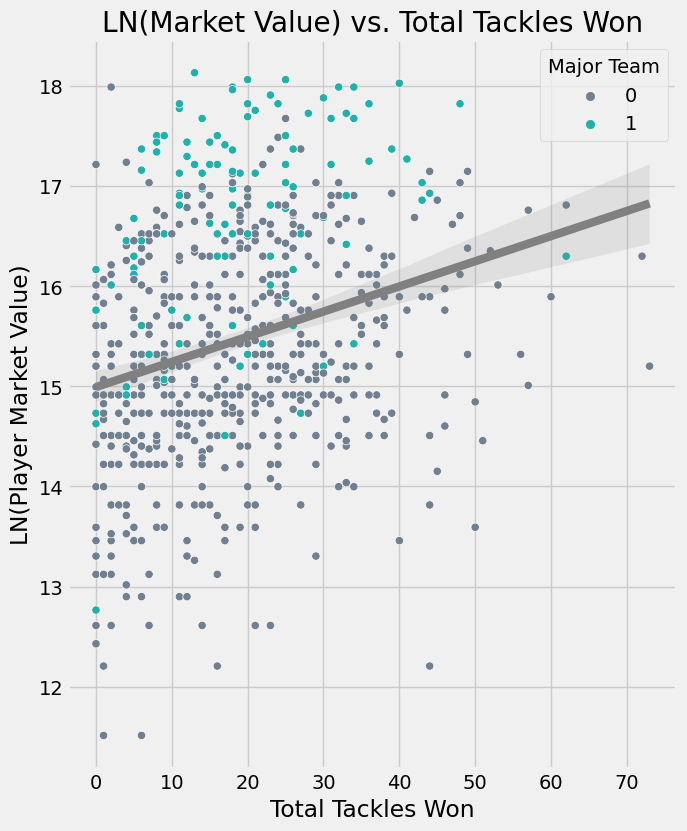

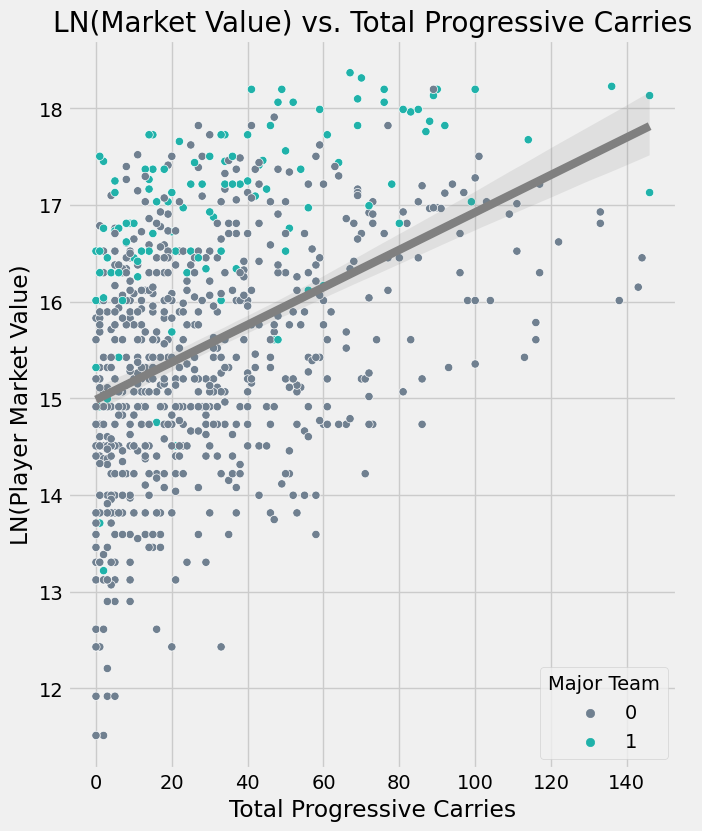

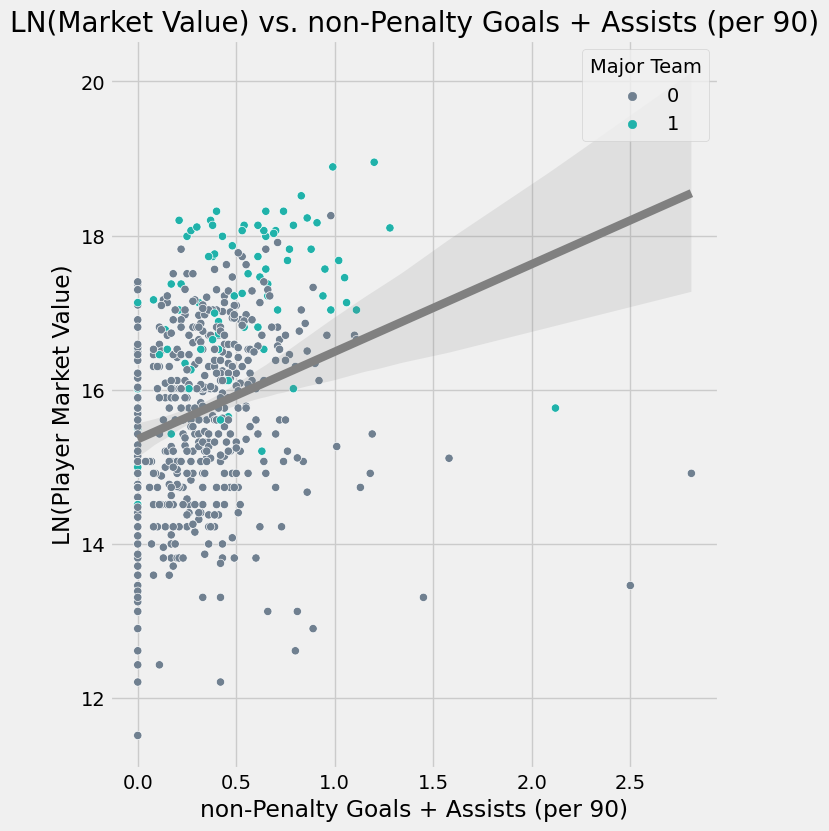

In [21]:
# Import the master file:
master_df = pd.read_csv(os.path.join(source_data_dir, f"master_file.csv"))

# Choose the stats of interest here:
stats_for_plotting = ['Total Tackles Won', 'Total Progressive Carries', 'non-Penalty Goals + Assists (per 90)']

# Tweak the master file and plot the statistics:
for position, col_dict, stat in zip(['DF', 'MF', 'FW'], col_rename_dicts, stats_for_plotting):

    # Filter:
    pos_df = filter_by_season_pos(master_df, position, 2223)

    # Rename columns:
    pos_df = rename_key_stats(pos_df, col_dict)

    # Add extra columns:
    pos_df = add_log_mkt_val_col(pos_df)
    pos_df = add_big_team_col(pos_df)
    pos_df = add_league_name_col(pos_df)

    # Plot:
    position_stat_plots(pos_df, position, stat)